# Project: Wrangling and Analyze Data

In [687]:
import pandas as pd
import numpy as np
import os
import time
import requests
import regex as re
import tweepy
import glob
import json
import seaborn as sns
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [6]:
df_arch = pd.read_csv('twitter-archive-enhanced.csv')
print(df_arch.shape)
df_arch.head(2)

(2356, 17)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [8]:
url ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [16]:
with open(os.path.join(url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [18]:
df_img = pd.read_csv('image-predictions.tsv', sep='\t')
print(df_img.shape)
df_img.head(3)

(2075, 12)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [43]:
# remove keys on porject submit
consumer_key = 'API Key'
consumer_secret = 'API Key Secret'
access_token = 'Access Token'
access_secret = 'Access Token Secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [48]:
# create list of tweet ids
tweet_ids = df_arch.tweet_id.values
ids[:5]

array([892420643555336193, 892177421306343426, 891815181378084864,
       891689557279858688, 891327558926688256], dtype=int64)

In [54]:
# initilize start of timer
start = time.time()
# create error dictionary
id_errors = {}
# set varible to track id rank
ranking = 0

# create and open json file to write tweet data to
with open('tweet_json.txt', 'w') as jfileout:

    # loop through tweet ids
    for tweet_id in tweet_ids:
        # print new rank and id
        ranking += 1
        print('[' + str(ranking) + ']' + str(tweet_id), end=' ')
        try:
            # call tweet with tweet_id to get tweet
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            # write to json file tweet_json.txt
            json.dump(tweet._json, jfileout)
            jfileout.write('\n')
            # print success
            print('Pass', end='')
        except tweepy.TweepyException as e:
            # prints and records error: cite [twitter-api.py from Udacity.com]
            print('Fail')
            id_errors[tweet_id] = e
            
        # set and print time diff  
        end = time.time()
        print('{' + str(end - start) + '}', end = ' | ')

[1]892420643555336193 Pass{0.24357151985168457} | [2]892177421306343426 Pass{0.43547511100769043} | [3]891815181378084864 Pass{0.6989433765411377} | [4]891689557279858688 Pass{0.9091377258300781} | [5]891327558926688256 Pass{1.091322422027588} | [6]891087950875897856 Pass{1.2896003723144531} | [7]890971913173991426 Pass{1.528071403503418} | [8]890729181411237888 Pass{1.7217512130737305} | [9]890609185150312448 Pass{1.9022557735443115} | [10]890240255349198849 Pass{2.104017496109009} | [11]890006608113172480 Pass{2.288632869720459} | [12]889880896479866881 Pass{2.4628400802612305} | [13]889665388333682689 Pass{2.6831607818603516} | [14]889638837579907072 Pass{2.8754289150238037} | [15]889531135344209921 Pass{3.044886589050293} | [16]889278841981685760 Pass{3.2238025665283203} | [17]888917238123831296 Pass{3.4088170528411865} | [18]888804989199671297 Pass{3.609186887741089} | [19]888554962724278272 Pass{3.794731378555298} | [20]888202515573088257 Fail
{3.9649484157562256} | [21]888078434

{30.780049324035645} | [157]861383897657036800 Pass{31.03567147254944} | [158]861288531465048066 Pass{31.250123023986816} | [159]861005113778896900 Pass{31.432340621948242} | [160]860981674716409858 Pass{31.62985324859619} | [161]860924035999428608 Pass{31.868558645248413} | [162]860563773140209665 Pass{32.03843283653259} | [163]860524505164394496 Pass{32.224467754364014} | [164]860276583193509888 Pass{32.399582386016846} | [165]860184849394610176 Pass{32.57061052322388} | [166]860177593139703809 Pass{32.791399002075195} | [167]859924526012018688 Pass{32.956607818603516} | [168]859851578198683649 Pass{33.149373292922974} | [169]859607811541651456 Pass{33.35419201850891} | [170]859196978902773760 Pass{33.568878412246704} | [171]859074603037188101 Pass{33.79741644859314} | [172]858860390427611136 Pass{34.015400409698486} | [173]858843525470990336 Pass{34.18487477302551} | [174]858471635011153920 Pass{34.3874990940094} | [175]858107933456039936 Pass{34.58081603050232} | [176]8579899903573

{59.26210117340088} | [300]836989968035819520 Pass{59.48730707168579} | [301]836753516572119041 Pass{59.68017315864563} | [302]836677758902222849 Pass{59.85737371444702} | [303]836648853927522308 Pass{60.05196833610535} | [304]836397794269200385 Pass{60.25227642059326} | [305]836380477523124226 Pass{60.455907106399536} | [306]836260088725786625 Pass{60.66289472579956} | [307]836001077879255040 Pass{60.85697102546692} | [308]835685285446955009 Pass{61.11606812477112} | [309]835574547218894849 Pass{61.29728674888611} | [310]835536468978302976 Pass{61.58649516105652} | [311]835309094223372289 Pass{61.79544639587402} | [312]835297930240217089 Pass{61.99407434463501} | [313]835264098648616962 Pass{62.19435930252075} | [314]835246439529840640 Pass{62.39180278778076} | [315]835172783151792128 Pass{62.56951880455017} | [316]835152434251116546 Pass{62.786139249801636} | [317]834931633769889797 Pass{63.026700496673584} | [318]834786237630337024 Pass{63.23271870613098} | [319]834574053763584002 P

{76.16831874847412} | [384]827199976799354881 Pass{76.35119605064392} | [385]826958653328592898 Pass{76.52215003967285} | [386]826848821049180160 Pass{76.75491118431091} | [387]826615380357632002 Pass{76.95519018173218} | [388]826598799820865537 Pass{77.14081335067749} | [389]826598365270007810 Pass{77.32534408569336} | [390]826476773533745153 Pass{77.54308080673218} | [391]826240494070030336 Pass{77.78109097480774} | [392]826204788643753985 Pass{77.98854899406433} | [393]826115272272650244 Pass{78.19176697731018} | [394]825876512159186944 Pass{78.39284873008728} | [395]825829644528148480 Pass{78.57721781730652} | [396]825535076884762624 Pass{78.77780199050903} | [397]825147591692263424 Pass{78.96328711509705} | [398]825120256414846976 Pass{79.21152853965759} | [399]825026590719483904 Pass{79.39634656906128} | [400]824796380199809024 Pass{79.63549399375916} | [401]824775126675836928 Pass{79.82934212684631} | [402]824663926340194305 Pass{80.08438777923584} | [403]824325613288833024 Pass

{101.5798225402832} | [508]812709060537683968 Pass{101.75541496276855} | [509]812503143955202048 Pass{101.94671988487244} | [510]812466873996607488 Pass{102.13200354576111} | [511]812372279581671427 Pass{102.34506940841675} | [512]811985624773361665 Pass{102.53426122665405} | [513]811744202451197953 Pass{102.81221151351929} | [514]811647686436880384 Pass{102.99761414527893} | [515]811627233043480576 Pass{103.17869091033936} | [516]811386762094317568 Pass{103.36782813072205} | [517]810984652412424192 Pass{103.58523631095886} | [518]810896069567610880 Pass{103.80267810821533} | [519]810657578271330305 Pass{103.9703369140625} | [520]810284430598270976 Pass{104.17086601257324} | [521]810254108431155201 Pass{104.35303974151611} | [522]809920764300447744 Pass{104.51665759086609} | [523]809808892968534016 Pass{104.71886801719666} | [524]809448704142938112 Pass{104.9182870388031} | [525]809220051211603969 Pass{105.11991310119629} | [526]809084759137812480 Pass{105.30510020256042} | [527]808838

{113.43289017677307} | [568]802239329049477120 Pass{113.6867003440857} | [569]802185808107208704 Pass{113.89063501358032} | [570]801958328846974976 Pass{114.0845878124237} | [571]801854953262350336 Pass{114.2733142375946} | [572]801538201127157760 Pass{114.47469305992126} | [573]801285448605831168 Pass{114.67438459396362} | [574]801167903437357056 Pass{114.85927248001099} | [575]801127390143516673 Pass{115.07990312576294} | [576]801115127852503040 Pass{115.26150226593018} | [577]800859414831898624 Pass{115.46241283416748} | [578]800855607700029440 Pass{115.66369724273682} | [579]800751577355128832 Pass{115.85831570625305} | [580]800513324630806528 Pass{116.05862975120544} | [581]800459316964663297 Pass{116.22850012779236} | [582]800443802682937345 Pass{116.42904424667358} | [583]800388270626521089 Pass{116.61175298690796} | [584]800188575492947969 Pass{116.83051490783691} | [585]800141422401830912 Pass{117.01568102836609} | [586]800018252395122689 Pass{117.30563998222351} | [587]799774

Pass{146.53084063529968} | [731]781661882474196992 Pass{146.70230317115784} | [732]781655249211752448 Pass{146.9035129547119} | [733]781524693396357120 Pass{147.11455082893372} | [734]781308096455073793 Pass{147.33587384223938} | [735]781251288990355457 Pass{147.52196216583252} | [736]781163403222056960 Pass{147.72287917137146} | [737]780931614150983680 Pass{147.92299151420593} | [738]780858289093574656 Pass{148.0925600528717} | [739]780800785462489090 Pass{148.3102412223816} | [740]780601303617732608 Pass{148.4937403202057} | [741]780543529827336192 Pass{148.677494764328} | [742]780496263422808064 Pass{148.89486145973206} | [743]780476555013349377 Pass{149.08824968338013} | [744]780459368902959104 Pass{149.30826616287231} | [745]780192070812196864 Pass{149.51281142234802} | [746]780092040432480260 Pass{149.7135500907898} | [747]780074436359819264 Pass{149.9989790916443} | [748]779834332596887552 Pass{150.2162365913391} | [749]779377524342161408 Pass{150.41562247276306} | [750]77912435

Rate limit reached. Sleeping for: 356


{168.36228680610657} | [841]767122157629476866 Pass{525.7321019172668} | [842]766864461642756096 Fail
{525.9008162021637} | [843]766793450729734144 Pass{526.0781812667847} | [844]766714921925144576 Pass{526.2639980316162} | [845]766693177336135680 Pass{526.4530930519104} | [846]766423258543644672 Pass{526.6498806476593} | [847]766313316352462849 Pass{526.8388919830322} | [848]766078092750233600 Pass{527.0972962379456} | [849]766069199026450432 Pass{527.2755365371704} | [850]766008592277377025 Pass{527.4461085796356} | [851]765719909049503744 Pass{527.6538178920746} | [852]765669560888528897 Pass{528.7602982521057} | [853]765395769549590528 Pass{528.9686176776886} | [854]765371061932261376 Pass{529.1719861030579} | [855]765222098633691136 Pass{529.3643665313721} | [856]764857477905154048 Pass{529.5486481189728} | [857]764259802650378240 Pass{529.7478468418121} | [858]763956972077010945 Pass{529.9329071044922} | [859]763837565564780549 Pass{530.1490364074707} | [860]763183847194451968 Pa

{556.5553359985352} | [934]753655901052166144 Pass{556.7713005542755} | [935]753420520834629632 Pass{556.9722907543182} | [936]753398408988139520 Pass{557.1926093101501} | [937]753375668877008896 Pass{557.3897142410278} | [938]753298634498793472 Pass{557.5752918720245} | [939]753294487569522689 Pass{557.7761423587799} | [940]753039830821511168 Pass{558.066460609436} | [941]753026973505581056 Pass{558.2466263771057} | [942]752932432744185856 Pass{558.479245185852} | [943]752917284578922496 Pass{558.6803209781647} | [944]752701944171524096 Pass{558.9033000469208} | [945]752682090207055872 Pass{559.0802824497223} | [946]752660715232722944 Pass{559.3338665962219} | [947]752568224206688256 Pass{559.5405883789062} | [948]752519690950500352 Pass{559.7501983642578} | [949]752334515931054080 Pass{559.9516916275024} | [950]752309394570878976 Pass{560.1910116672516} | [951]752173152931807232 Pass{560.3993139266968} | [952]751950017322246144 Pass{560.5843889713287} | [953]751937170840121344 Pass{5

Pass{594.328497171402} | [1097]736365877722001409 Pass{594.543518781662} | [1098]736225175608430592 Pass{594.7458829879761} | [1099]736010884653420544 Pass{594.9756805896759} | [1100]735991953473572864 Pass{595.1784248352051} | [1101]735648611367784448 Pass{595.363867521286} | [1102]735635087207878657 Pass{595.5644392967224} | [1103]735274964362878976 Pass{595.7492206096649} | [1104]735256018284875776 Pass{595.9412186145782} | [1105]735137028879360001 Pass{596.1295835971832} | [1106]734912297295085568 Pass{596.2981703281403} | [1107]734787690684657664 Pass{596.4985990524292} | [1108]734776360183431168 Pass{596.6838436126709} | [1109]734559631394082816 Pass{596.8908233642578} | [1110]733828123016450049 Pass{597.0698022842407} | [1111]733822306246479872 Pass{597.2557842731476} | [1112]733482008106668032 Pass{597.4681763648987} | [1113]733460102733135873 Pass{597.6573207378387} | [1114]733109485275860992 Pass{597.8584499359131} | [1115]732732193018155009 Pass{598.0670449733734} | [1116]73

Pass{626.3966662883759} | [1258]710296729921429505 Pass{626.5785186290741} | [1259]710283270106132480 Pass{626.7513294219971} | [1260]710272297844797440 Pass{626.9361619949341} | [1261]710269109699739648 Pass{627.1839146614075} | [1262]710153181850935296 Pass{627.3953683376312} | [1263]710140971284037632 Pass{627.5860941410065} | [1264]710117014656950272 Pass{627.7719841003418} | [1265]709918798883774466 Pass{627.9726758003235} | [1266]709901256215666688 Pass{628.1897077560425} | [1267]709852847387627521 Pass{628.3747642040253} | [1268]709566166965075968 Pass{628.5756320953369} | [1269]709556954897764353 Pass{628.801424741745} | [1270]709519240576036864 Pass{628.9925110340118} | [1271]709449600415961088 Pass{629.1933469772339} | [1272]709409458133323776 Pass{629.4183437824249} | [1273]709225125749587968 Pass{629.6105649471283} | [1274]709207347839836162 Pass{629.864738702774} | [1275]709198395643068416 Pass{630.0500977039337} | [1276]709179584944730112 Pass{630.2664196491241} | [1277]7

Pass{661.4284045696259} | [1419]698355670425473025 Pass{661.6297609806061} | [1420]698342080612007937 Pass{661.8461945056915} | [1421]698262614669991936 Pass{662.0313560962677} | [1422]698195409219559425 Pass{662.2321240901947} | [1423]698178924120031232 Pass{662.4393126964569} | [1424]697995514407682048 Pass{662.649162530899} | [1425]697990423684476929 Pass{662.8490643501282} | [1426]697943111201378304 Pass{663.0502586364746} | [1427]697881462549430272 Pass{663.2347621917725} | [1428]697630435728322560 Pass{663.4359381198883} | [1429]697616773278015490 Pass{663.653112411499} | [1430]697596423848730625 Pass{663.8373475074768} | [1431]697575480820686848 Pass{664.0228145122528} | [1432]697516214579523584 Pass{664.223394870758} | [1433]697482927769255936 Pass{664.4082868099213} | [1434]697463031882764288 Pass{664.6089701652527} | [1435]697270446429966336 Pass{664.8093338012695} | [1436]697259378236399616 Pass{665.0337445735931} | [1437]697255105972801536 Pass{666.2627635002136} | [1438]69

Pass{700.991292476654} | [1580]687312378585812992 Pass{701.1766312122345} | [1581]687127927494963200 Pass{701.385575056076} | [1582]687124485711986689 Pass{701.5780534744263} | [1583]687109925361856513 Pass{701.778727054596} | [1584]687102708889812993 Pass{701.9483232498169} | [1585]687096057537363968 Pass{702.1171445846558} | [1586]686947101016735744 Pass{702.3172924518585} | [1587]686760001961103360 Pass{702.4819042682648} | [1588]686749460672679938 Pass{702.6651678085327} | [1589]686730991906516992 Pass{702.8975803852081} | [1590]686683045143953408 Pass{703.0829293727875} | [1591]686618349602762752 Pass{703.2834360599518} | [1592]686606069955735556 Pass{703.4843611717224} | [1593]686394059078897668 Pass{703.6849014759064} | [1594]686386521809772549 Pass{703.885972738266} | [1595]686377065986265092 Pass{704.0871448516846} | [1596]686358356425093120 Pass{704.3067936897278} | [1597]686286779679375361 Pass{704.505420923233} | [1598]686050296934563840 Pass{704.7224171161652} | [1599]6860

Rate limit reached. Sleeping for: 692


Pass{1426.532793521881} | [1742]679475951516934144 Pass{1426.7117025852203} | [1743]679462823135686656 Pass{1426.9121961593628} | [1744]679405845277462528 Pass{1427.0981845855713} | [1745]679158373988876288 Pass{1427.2832508087158} | [1746]679148763231985668 Pass{1427.4700582027435} | [1747]679132435750195208 Pass{1427.653282403946} | [1748]679111216690831360 Pass{1427.8635423183441} | [1749]679062614270468097 Pass{1428.0556962490082} | [1750]679047485189439488 Pass{1428.295874118805} | [1751]679001094530465792 Pass{1428.4733300209045} | [1752]678991772295516161 Pass{1428.673487663269} | [1753]678969228704284672 Pass{1428.8431842327118} | [1754]678800283649069056 Pass{1429.0462028980255} | [1755]678798276842360832 Pass{1429.2648873329163} | [1756]678774928607469569 Pass{1429.464703321457} | [1757]678767140346941444 Pass{1429.6978182792664} | [1758]678764513869611008 Pass{1429.8906817436218} | [1759]678755239630127104 Pass{1430.0753917694092} | [1760]678740035362037760 Pass{1430.2607522

Pass{1457.3351566791534} | [1901]674664755118911488 Pass{1457.50519323349} | [1902]674646392044941312 Pass{1457.6900889873505} | [1903]674644256330530816 Pass{1457.875202178955} | [1904]674638615994089473 Pass{1458.0915043354034} | [1905]674632714662858753 Pass{1458.2929570674896} | [1906]674606911342424069 Pass{1458.4938945770264} | [1907]674468880899788800 Pass{1458.7248759269714} | [1908]674447403907457024 Pass{1458.977786540985} | [1909]674436901579923456 Pass{1459.171975851059} | [1910]674422304705744896 Pass{1459.3452768325806} | [1911]674416750885273600 Pass{1459.530241727829} | [1912]674410619106390016 Pass{1459.7306888103485} | [1913]674394782723014656 Pass{1459.9390540122986} | [1914]674372068062928900 Pass{1460.1176130771637} | [1915]674330906434379776 Pass{1460.2868654727936} | [1916]674318007229923329 Pass{1460.4876124858856} | [1917]674307341513269249 Pass{1460.6822793483734} | [1918]674291837063053312 Pass{1460.8516755104065} | [1919]674271431610523648 Pass{1461.03635025

Pass{1488.4448640346527} | [2061]671182547775299584 Pass{1488.6407465934753} | [2062]671166507850801152 Pass{1488.8226113319397} | [2063]671163268581498880 Pass{1489.047226190567} | [2064]671159727754231808 Pass{1489.2462017536163} | [2065]671154572044468225 Pass{1489.4834187030792} | [2066]671151324042559489 Pass{1489.7012178897858} | [2067]671147085991960577 Pass{1489.8937015533447} | [2068]671141549288370177 Pass{1490.1006064414978} | [2069]671138694582165504 Pass{1490.275978565216} | [2070]671134062904504320 Pass{1490.4648354053497} | [2071]671122204919246848 Pass{1490.6899654865265} | [2072]671115716440031232 Pass{1490.8721554279327} | [2073]671109016219725825 Pass{1491.095103263855} | [2074]670995969505435648 Pass{1491.2803437709808} | [2075]670842764863651840 Pass{1491.4656155109406} | [2076]670840546554966016 Pass{1491.6354095935822} | [2077]670838202509447168 Pass{1491.8208060264587} | [2078]670833812859932673 Pass{1492.000247478485} | [2079]670832455012716544 Pass{1492.181617

Pass{1519.722549200058} | [2221]668484198282485761 Pass{1519.9074144363403} | [2222]668480044826800133 Pass{1520.092526435852} | [2223]668466899341221888 Pass{1520.2774457931519} | [2224]668297328638447616 Pass{1520.4471786022186} | [2225]668291999406125056 Pass{1520.6413190364838} | [2226]668286279830867968 Pass{1520.8264696598053} | [2227]668274247790391296 Pass{1521.0356304645538} | [2228]668268907921326080 Pass{1521.2126688957214} | [2229]668256321989451776 Pass{1521.414001941681} | [2230]668248472370458624 Pass{1521.6283321380615} | [2231]668237644992782336 Pass{1521.8668336868286} | [2232]668226093875376128 Pass{1522.081095457077} | [2233]668221241640230912 Pass{1522.3291237354279} | [2234]668204964695683073 Pass{1522.4981195926666} | [2235]668190681446379520 Pass{1522.7303838729858} | [2236]668171859951755264 Pass{1522.9007189273834} | [2237]668154635664932864 Pass{1523.0859529972076} | [2238]668142349051129856 Pass{1523.3021876811981} | [2239]668113020489474048 Pass{1523.487892

In [79]:
# print amount in error list
print('{} errors listed'.format(len(id_errors)))
# print errors
print(id_errors)

29 errors listed
{888202515573088257: NotFound('404 Not Found\n144 - No status found with that ID.'), 873697596434513921: NotFound('404 Not Found\n144 - No status found with that ID.'), 872668790621863937: NotFound('404 Not Found\n144 - No status found with that ID.'), 872261713294495745: NotFound('404 Not Found\n144 - No status found with that ID.'), 869988702071779329: NotFound('404 Not Found\n144 - No status found with that ID.'), 866816280283807744: NotFound('404 Not Found\n144 - No status found with that ID.'), 861769973181624320: NotFound('404 Not Found\n144 - No status found with that ID.'), 856602993587888130: NotFound('404 Not Found\n144 - No status found with that ID.'), 856330835276025856: NotFound('404 Not Found\n34 - Sorry, that page does not exist.'), 851953902622658560: NotFound('404 Not Found\n144 - No status found with that ID.'), 851861385021730816: NotFound('404 Not Found\n144 - No status found with that ID.'), 845459076796616705: NotFound('404 Not Found\n144 - No st

In [72]:
# build empty list for extracted data
tweet_dict = []
# track line rank
rank = 0

# open recently colected tweet text file
with open('tweet_json.txt', 'r', ) as jfilein:
    # loop through text lines and extract data
    for line in jfilein:
        rank +=1
        try:
            # extract line
            tweet_data = json.loads(line)
            # load select data to list
            tweet_dict.append({'id' : tweet_data['id'], 
                              'retweet_count' : tweet_data['retweet_count'], 
                              'favorite_count' : tweet_data['favorite_count']})
        except Exception as e:
            print('At line {}: {}'.formate(rank, e))

# convert list to dataframe        
df_tweet = pd.DataFrame(tweet_dict, columns=['id', 'retweet_count', 'favorite_count'])

In [73]:
print(df_tweet.shape)
df_tweet.head()

(2327, 3)


,id,retweet_count,favorite_count
0,892420643555336193,7086,34160
1,892177421306343426,5344,29625
2,891815181378084864,3517,22314
3,891689557279858688,7280,37299
4,891327558926688256,7826,35639


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [500]:
archive.tweet_id.duplicated().any()

True

In [85]:
#display df_arch dataframe top rows
df_arch.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


`df_arch` columns:

- **tweet_id**: numeric value that uniquely identifies tweet  
- **in_reply_to_status_id**: unique numeric value identifying response tweet  
- **in_reply_to_user_id**: user id of response tweet  
- **timestamp**: Time and date of tweet  
- **source**: application feature used to access twiiter and post tweet  
- **text**: content of the tweet  
- **retweeted_status_id**: unique numeric value identifying retweet  
- **retweeted_status_user_id**: user id of retweet  
- **retweeted_status_timestamp**: time and data of retweet  
- **expanded_urls**: full url path to tweet  
- **rating_numerator**: numeric number to rate dog  
- **rating_denominator**: numeric number that rating compares with  
- **name**: name of dog  
- **doggo**: tweet says dog is doggo  
- **floofer**: tweet says dog is floofer  
- **pupper**: tweet says dog is pupper  
- **puppo**: tweet says dog is puppo  

In [86]:
# display df_img dataframe top rows
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


`df_img` columns:

- **tweet_id**: numeric value that uniquely identifies tweet
- **jpg_url**: image url
- **img_num**: image num in tweet that corresponds to most confidant prediction
- **p1**: prediction of image for tweet image 1
- **p1_conf**: algorithm confidence of image 1 prediction
- **p1_dog**: is p1 prediction a dog
- **p2**: prediction of breed for tweet image 2
- **p2_conf**: algorithm confidence of image 2 prediction
- **p1_dog**: is p2 prediction a dog
- **p3**: prediction of breed for tweet image 3
- **p3_conf**: algorithm confidence of image 3 prediction
- **p1_dog**: is p3 prediction a dog

In [87]:
# display df_tweet dataframe top rows
df_tweet.head()

,id,retweet_count,favorite_count
0,892420643555336193,7086,34160
1,892177421306343426,5344,29625
2,891815181378084864,3517,22314
3,891689557279858688,7280,37299
4,891327558926688256,7826,35639


`df_tweet` columns:

- **id**: unique numeric value identifiying tweet
- **retweet_count**: amount tweet as been retweeted
- **favorite_count**: number of favorites for tweet

In [109]:
df_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [93]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [94]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [105]:
df_arch[df_arch.index == 30].text

30    @NonWhiteHat @MayhewMayhem omg hello tanner yo...
Name: text, dtype: object

In [106]:
df_arch[df_arch.index == 35].text

35    I have a new hero and his name is Howard. 14/1...
Name: text, dtype: object

In [386]:
len(df_arch[df_arch.rating_denominator != 10])

23

### Quality issues
1. `df_arch`: timestamp column not timestamp datatype</br>
</br>
2. `df_arch`: source column urls still in html tags</br>
</br>  
3. `df_arch`: doggo, floofer, pupper, and puppo columns using wrong null value format</br>
</br>
4. `df_arch`: rating_denominator column has 23 values not equal 10</br>
</br> 
5. `df_arch`: many tweets are retweets as shown in retweeted_status_id column</br>
</br>
6. `df_img`: p1, p2, and p2 columns use underscores in dog bread names.
</br>
7. `df_img`: some predicted images not dogs</br>
</br>
8. All id columns are not string datatype</br>

### Tidiness issues
1. `df_arch`: doggo, floofer, pupper, and puppo columns are all of the same variable *dog stage*</br>
</br>
2. All tables use the same tweet ids as their unique identifiers.</br>

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [525]:
# Make copies of original pieces of data
archive = df_arch.copy()
images = df_img.copy()
counts = df_tweet.copy()

### Issue #1: `df_arch`: timestamp column not timestamp datatype

#### Define: convert timestamp column from string to datatime using pandas `to_datetime` method

#### Code

In [526]:
archive.timestamp = pd.to_datetime(archive.timestamp)

#### Test

In [527]:
# diplay dataframe top
print(archive.timestamp.head(2))
# diplay dataframe bottom
print(archive.timestamp.tail(2))
# calc time diff between first and last row to to test if datatype is numeric
print('Time Differance: {}'.format(archive.timestamp[0] - archive.timestamp[2355]))

0   2017-08-01 16:23:56+00:00
1   2017-08-01 00:17:27+00:00
Name: timestamp, dtype: datetime64[ns, UTC]
2354   2015-11-15 23:05:30+00:00
2355   2015-11-15 22:32:08+00:00
Name: timestamp, dtype: datetime64[ns, UTC]
Time Differance: 624 days 17:51:48


### Issue #2: `df_arch`: source column urls still in html tags

#### Define

#### Code

In [528]:
# cite [Udacity knowledge forum]

# function to replace html tags with blank strings
def remove_html_tag(html):
    source = re.sub('<.*?>','',html)
    return source

# apply the defined function to the source column
archive['source'] = archive['source'].apply(lambda x : remove_html_tag(x))

In [529]:
archive.source.head()

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: source, dtype: object

#### Test

### Issue #3: `df_arch`: many tweets are retweets as shown in retweeted_status_id column

#### Define: 
- Select rows where the `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp`  columns are equal to null. 
- Drop `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` columns

#### Code

In [530]:
# select row where retweet is null
archive = archive[archive.retweeted_status_id.isnull()]
archive = archive[archive.retweeted_status_user_id.isnull()]
archive = archive[archive.retweeted_status_timestamp.isnull()]

#### Test

In [531]:
print('Old row count: {}'.format(df_arch.shape[0]))
print('New row count: {}'.format(archive.shape[0]))
print('All retweet id column is null: {}'.format(archive.retweeted_status_id.isnull().any()))

Old row count: 2356
New row count: 2175
All retweet id column is null: True


#### Code

In [532]:
# drop retweet columns
archive = archive.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#### Test

In [533]:
archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue #4: `df_arch`: rating_denominator column has 23 values not equal 10

#### Define: Devide the numerator by the denominator and multiply the result by ten. Then sett all denominators equal to ten.

#### Code

In [534]:
# devide numerator by the denominator then multiply by ten
archive.rating_numerator = (((round((archive.rating_numerator / archive.rating_denominator) * 10))) // 1).fillna(0).astype(int)

#set all denominators to 10
archive.rating_denominator = 10

#### Test

In [535]:
# old values sample
print('Old')
print(df_arch.iloc[516][10:12])
print(df_arch.iloc[1598][10:12])
print(df_arch.iloc[1662][10:12])
# new values sample
print('\nNew')
print(archive.iloc[516][10:12])
print(archive.iloc[1598][10:12])
print(archive.iloc[1662][10:12])

Old
rating_numerator      24
rating_denominator     7
Name: 516, dtype: object
rating_numerator       4
rating_denominator    20
Name: 1598, dtype: object
rating_numerator       7
rating_denominator    11
Name: 1662, dtype: object

New
doggo      None
floofer    None
Name: 641, dtype: object
doggo      None
floofer    None
Name: 1777, dtype: object
doggo      None
floofer    None
Name: 1841, dtype: object


### Issue #5: `df_img`: some predicted images not dogs

#### Define: select images when at least one prediction is a dog (remove when all predictions not a dog)

#### Code

In [536]:
# select row where at least one prediction for dog is True
images = images[(images['p1_dog']==True) | (images['p2_dog']==True) | (images['p3_dog']==True)]

#### Test

In [537]:
# Rows where all predictions for dog is False
images[(images['p1_dog']==False) & (images['p2_dog']==False) & (images['p3_dog']==False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #6: `df_img`: p1, p2, and p2 columns use underscores in dog bread names

#### Define: Replace underscore in dog predictions with space

#### Code

In [538]:
# function to replace underscore with space
def remove_underscore(name):
    source = re.sub('_',' ',name)
    return source

# apply the defined function to prediction columns
images['p1'] = images['p1'].apply(lambda x : remove_underscore(x))
images['p2'] = images['p2'].apply(lambda x : remove_underscore(x))
images['p3'] = images['p3'].apply(lambda x : remove_underscore(x))

#### Test

In [539]:
images[['p1', 'p2', 'p3']].head()

,p1,p2,p3
0,Welsh springer spaniel,collie,Shetland sheepdog
1,redbone,miniature pinscher,Rhodesian ridgeback
2,German shepherd,malinois,bloodhound
3,Rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,Rottweiler,Doberman


### Issue #7: 
### `df_arch`: doggo, floofer, pupper, and puppo columns using wrong null value format
### `df_arch`: doggo, floofer, pupper, and puppo columns are all of the same variable *dog stage*

#### Define:

#### Code

In [606]:
# melt doggo, floofer, pupper, and puppo columns into one columns
archive2 = pd.melt(archive, 
            id_vars = ['tweet_id',
                       'in_reply_to_status_id',
                       'in_reply_to_user_id',
                       'timestamp',
                       'source',
                       'text',
                       'expanded_urls',
                       'rating_numerator',
                       'rating_denominator',
                       'name'], 
            value_name = 'dog_type')

# sort by dog type to drop appropriate duplicates
archive2 = archive2.sort_values('dog_type')

# drop the var column created from the melt
archive2 = archive2.drop(['variable'], axis=1)

# drop duplicates created by the melt
archive3 =  archive2.drop_duplicates(subset = 'tweet_id', keep='last').copy()

# convert None to pandas null
archive3 = archive3.replace('None', np.nan)

In [607]:
archive3.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
2095,667443425659232256,NaN,NaN,2015-11-19 20:44:47+00:00,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,NaN,NaN
2094,667453023279554560,NaN,NaN,2015-11-19 21:22:56+00:00,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,NaN
2093,667455448082227200,NaN,NaN,2015-11-19 21:32:34+00:00,Twitter Web Client,This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7,10,Reese,NaN
2092,667470559035432960,NaN,NaN,2015-11-19 22:32:36+00:00,Twitter Web Client,This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11,10,a,NaN
2091,667491009379606528,NaN,NaN,2015-11-19 23:53:52+00:00,Twitter Web Client,Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,7,10,NaN,NaN


#### Test

In [616]:
print(archive3[['name', 'dog_type']].head())
print(archive3[['name', 'dog_type']].tail())

         name dog_type
2095      NaN      NaN
2094  Cupcake      NaN
2093    Reese      NaN
2092        a      NaN
2091      NaN      NaN
        name dog_type
7430  Bayley    puppo
7059   Betty    puppo
7395    Kilo    puppo
7276     NaN    puppo
7298     NaN    puppo


In [609]:
archive3.sort_values('dog_type')
archive3[archive3.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type


### Issue #8: All tables use the same tweet ids as their unique identifiers

### Define: Merge all the dataframe into one, based on tweet id. Then drop the duplicate tweet id columns.

#### Code

In [610]:
# mearge archive and counts dataframes
twitter_data = pd.merge(archive3, counts, left_on='tweet_id', right_on = 'id')

# merge new dataframe with images dataframe
twitter_data = pd.merge(twitter_data, images, on = 'tweet_id')

# drop duplicate id column
twitter_data = twitter_data.drop(['id'], axis=1)

#### Test

In [611]:
twitter_data.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_type', 'retweet_count',
       'favorite_count', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

### Issue #9: All id columns are not string datatype

#### Define: change tweet_id column to string using `astype` pandas method.

#### Code

In [612]:
twitter_data.tweet_id = twitter_data.tweet_id.astype(str)

#### Test

In [613]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 0 to 1677
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1678 non-null   object             
 1   in_reply_to_status_id  20 non-null     float64            
 2   in_reply_to_user_id    20 non-null     float64            
 3   timestamp              1678 non-null   datetime64[ns, UTC]
 4   source                 1678 non-null   object             
 5   text                   1678 non-null   object             
 6   expanded_urls          1678 non-null   object             
 7   rating_numerator       1678 non-null   int32              
 8   rating_denominator     1678 non-null   int64              
 9   name                   1260 non-null   object             
 10  dog_type               259 non-null    object             
 11  retweet_count          1678 non-null   int64            

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [617]:
#sort by id
twitter_data = twitter_data.sort_values('tweet_id')
# save to csv
twitter_data.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [620]:
# data timespan
max(twitter_data.timestamp) - min(twitter_data.timestamp)

Timedelta('624 days 01:45:19')

In [670]:
# Top names tweeted
twitter_data.name.value_counts()[:12]

a          46
Cooper     10
Oliver      9
Tucker      9
Lucy        9
Charlie     9
Penny       8
Daisy       7
Sadie       7
the         7
Winston     7
Jax         6
Name: name, dtype: int64

In [624]:
# most common ratings
twitter_data.rating_numerator.value_counts()[:11]

12    424
11    362
10    360
13    225
9     133
8      69
7      31
14     23
6      17
5      15
4       6
Name: rating_numerator, dtype: int64

In [633]:
# largest, smallest, and avarge retweet count
print('Largest Retweet Count: {}'.format(twitter_data.retweet_count.max()))
print('Smallest Retweet Count: {}'.format(twitter_data.retweet_count.min()))
print('Average Retweet Count: {}'.format(round(twitter_data.retweet_count.mean())))

Largest Retweet Count: 71539
Smallest Retweet Count: 11
Average Retweet Count: 2308


In [634]:
# largest, smallest, and avarge favorite count
print('Largest Favorite Count: {}'.format(twitter_data.favorite_count.max()))
print('Smallest Favorite Count: {}'.format(twitter_data.favorite_count.min()))
print('Average Favorite Count: {}'.format(round(twitter_data.favorite_count.mean())))

Largest Favorite Count: 146184
Smallest Favorite Count: 66
Average Favorite Count: 8080


In [663]:
# timestamps for largest and smallest Retweet count
print(twitter_data[twitter_data.retweet_count == twitter_data.retweet_count.max()].timestamp)
print(twitter_data[twitter_data.retweet_count == twitter_data.retweet_count.min()].timestamp)

1451   2016-06-18 18:26:18+00:00
Name: timestamp, dtype: datetime64[ns, UTC]
73   2015-11-16 03:55:04+00:00
Name: timestamp, dtype: datetime64[ns, UTC]


In [660]:
# timestamps for largest and smallest Favorite count
print(twitter_data[twitter_data.favorite_count == twitter_data.favorite_count.max()].timestamp)
print(twitter_data[twitter_data.favorite_count == twitter_data.favorite_count.min()].timestamp)

1451   2016-06-18 18:26:18+00:00
Name: timestamp, dtype: datetime64[ns, UTC]
73   2015-11-16 03:55:04+00:00
Name: timestamp, dtype: datetime64[ns, UTC]


In [676]:
# Most common breeds of
print('Most common breeds for highest prediction')
print(twitter_data.p1.value_counts()[:11])
print('\nMost common breeds for second highest prediction')
print(twitter_data.p2.value_counts()[:11])
print('\nMost common breeds for lowest prediction')
print(twitter_data.p3.value_counts()[:11])

Most common breeds for highest prediction
golden retriever      139
Labrador retriever     92
Pembroke               88
Chihuahua              79
pug                    54
chow                   41
Samoyed                39
Pomeranian             38
toy poodle             37
malamute               29
cocker spaniel         27
Name: p1, dtype: int64

Most common breeds for second highest prediction
Labrador retriever          96
golden retriever            81
Cardigan                    72
Chihuahua                   43
Chesapeake Bay retriever    40
French bulldog              39
Pomeranian                  39
toy poodle                  36
Siberian husky              33
miniature poodle            32
cocker spaniel              32
Name: p2, dtype: int64

Most common breeds for lowest prediction
Labrador retriever           76
Chihuahua                    57
golden retriever             46
Eskimo dog                   36
kelpie                       33
kuvasz                       31
c

In [684]:
# Amount of Pembrokes and Cardigan welsh corgies predicted for same picture
print('p1 Pembrokes: {}'.format(len(twitter_data[twitter_data.p1 == 'Pembroke'])))
print('p1 Cardigan: {}'.format(len(twitter_data[twitter_data.p1 == 'Cardigan'])))
print('Overlap: {}'.format(len(twitter_data.query('(p1 == "Cardigan" | p1 == "Pembroke") & (p2 == "Cardigan" | p2 == "Pembroke")'))))
print('p2 Pembrokes: {}'.format(len(twitter_data[twitter_data.p2 == 'Pembroke'])))
print('p2 Cardigan: {}'.format(len(twitter_data[twitter_data.p2 == 'Cardigan'])))

p1 Pembrokes: 88
p1 Cardigan: 17
Overlap: 65
p2 Pembrokes: 25
p2 Cardigan: 72


### Insights:
1. Golden and Labrador retrievers most common breads, with Chihuahuas and Welsh Corgis somewhere close behind

2. Highest retweet count and highest favorite count both for the same tweet

3. Lowest retweet count and lowest favorite count both for the same tweet

4. Most common rating is from 10/10 to 13/11, with 12/10 in the lead

### Visualization


   Histogram of most common rating numerator compared to 10.


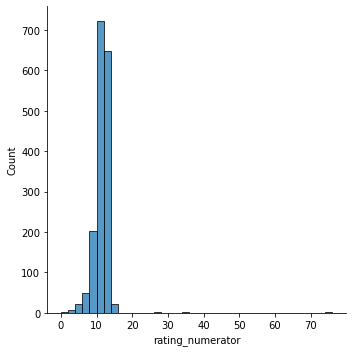

In [708]:
# visulize distribution of ratings
print('\n   Histogram of most common rating numerator compared to 10.')
sns.displot(twitter_data, x = 'rating_numerator',binwidth=2, legend=True);